## Problem Statement Text Analytics

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Find the number of characters, words and sentences for the mentioned documents. – 3 Marks
(Hint: use .words(), .raw(), .sent() for extracting counts)

Remove all the stopwords from all the three speeches. – 3 Marks
Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords) – 3 Marks
Plot the word cloud of each of the speeches of the variable. (after removing the stopwords) – 3 Marks

# Using: nltk.NaiveBayesClassifier

In [1]:
## Importing the necessary libraries along with the standard import

import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

Load the csv file available in the working or specified directory

In [2]:
## Loading the dataset
#import nltk
#nltk.download('inaugural')
#from nltk.corpus import inaugural
#inaugural.fileids()
#inaugural.raw('1941-Roosevelt.txt')
#inaugural.raw('1961-Kennedy.txt')
#inaugural.raw('1973-Nixon.txt')

In [39]:
roosevelt = pd.read_csv('1941-Roosevelt.txt', delimiter = "\t", header = None)
kennedy = pd.read_csv('1961-Kennedy.txt', delimiter = "\t", header = None)
nixon = pd.read_csv('1973-Nixon.txt', delimiter = "\t", header = None)

In [41]:
roosevelt[0] = roosevelt[0].str.replace('[^\w\s]','')
kennedy[0] = kennedy[0].str.replace('[^\w\s]','')
nixon[0] = nixon[0].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.

In [42]:
## Converting all the words to lower case
roosevelt[0] = roosevelt[0].apply(lambda x: " ".join(x.lower() for x in x.split()))
kennedy[0] = kennedy[0].apply(lambda x: " ".join(x.lower() for x in x.split()))
nixon[0] = nixon[0].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [47]:
roosevelt['char_count'] = roosevelt[0].str.len()
kennedy['char_count'] = kennedy[0].str.len()
nixon['char_count'] = nixon[0].str.len()

In [48]:
## Let's get a word count without writing a lambda function
roosevelt['totalwords'] = [len(x.split()) for x in roosevelt[0].tolist()]
kennedy['totalwords'] = [len(x.split()) for x in kennedy[0].tolist()]
nixon['totalwords'] = [len(x.split()) for x in nixon[0].tolist()]

### Average Word Length

In [49]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

roosevelt['avg_word'] = roosevelt[0].apply(lambda x: avg_word(x))
kennedy['avg_word'] = kennedy[0].apply(lambda x: avg_word(x))
nixon['avg_word'] = nixon[0].apply(lambda x: avg_word(x))

### Number of stop Words

In [51]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

roosevelt['stopwords'] = roosevelt[0].apply(lambda x: len([x for x in x.split() if x in stop]))
kennedy['stopwords'] = kennedy[0].apply(lambda x: len([x for x in x.split() if x in stop]))
nixon['stopwords'] = nixon[0].apply(lambda x: len([x for x in x.split() if x in stop]))

### Number of hastags

In [52]:
roosevelt['hastags'] = roosevelt[0].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
kennedy['hastags'] = kennedy[0].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
nixon['hastags'] = nixon[0].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))

### Number of numerics

In [53]:
roosevelt['numerics'] = roosevelt[0].apply(lambda x: len(re.findall(r'[0-9]',x)))
kennedy['numerics'] = kennedy[0].apply(lambda x: len(re.findall(r'[0-9]',x)))
nixon['numerics'] = nixon[0].apply(lambda x: len(re.findall(r'[0-9]',x)))

### Number of Uppercase Words

In [ ]:
roosevelt['upper_words'] = roosevelt[0].apply(lambda x: len([x for x in x.split() if x.isupper()]))
kennedy['upper_words'] = kennedy[0].apply(lambda x: len([x for x in x.split() if x.isupper()]))
nixon['upper_words'] = nixon[0].apply(lambda x: len([x for x in x.split() if x.isupper()]))

### Number of Uppercase Letters

In [ ]:
roosevelt['upper_letter'] = roosevelt[0].apply(lambda x: len(re.findall(r'[A-Z]',x)))
kennedy['upper_letter'] = kennedy[0].apply(lambda x: len(re.findall(r'[A-Z]',x)))
nixon['upper_letter'] = nixon[0].apply(lambda x: len(re.findall(r'[A-Z]',x)))

In [70]:
from nltk.tokenize import sent_tokenize
roosevelt['sentence '] = roosevelt[0].apply(lambda x: len(sent_tokenize(x)))
kennedy['sentence '] = kennedy[0].apply(lambda x: len(sent_tokenize(x)))
nixon['sentence '] = nixon[0].apply(lambda x: len(sent_tokenize(x)))

### 2.1) Find the number of characters, words and sentences for the mentioned documents. (Hint: use .words(), .raw(), .sent() for extracting counts) .....3

In [71]:
roosevelt.head()

,0,char_count,totalwords,avg_word,stopwords,hastags,numerics,sentence
0,on each national day of inauguration since 178...,118,20,4.950000,9,0,4,1
1,in washingtons day the task of the people was ...,82,16,4.187500,8,0,0,1
2,in lincolns day the task of the people was to ...,94,17,4.588235,9,0,0,1
3,in this day the task of the people is to save ...,107,20,4.400000,12,0,0,1
4,to us there has come a time in the midst of sw...,239,52,3.615385,33,0,0,1


In [82]:
print('*****************   Roosevelt Speech Results   **************************')
print('Number Of Total Characters: ',roosevelt['char_count'].sum(axis=0))
print('Number Of Total Words: ',roosevelt['totalwords'].sum(axis=0))
print('Number Of Total Sentence: ',roosevelt['sentence'].sum(axis=0))

*****************   Roosevelt Speech Results   **************************
Number Of Total Characters:  7262
Number Of Total Words:  1338


KeyError: 'sentence'

In [68]:
kennedy.head()

,0,char_count,totalwords,avg_word,stopwords,hastags,numerics
0,"vice president johnson, mr. speaker, mr. chief...",445,73,5.109589,25,0,0
1,the world is very different now. for man holds...,355,68,4.235294,35,0,0
2,we dare not forget today that we are the heirs...,512,96,4.343750,48,0,0
3,"let every nation know, whether it wishes us we...",217,40,4.450000,15,0,0
4,this much we pledge -- and more.,32,7,3.714286,3,0,0


In [69]:
nixon.head()

,0,char_count,totalwords,avg_word,stopwords,hastags,numerics
0,"mr. vice president, mr. speaker, mr. chief jus...",155,25,5.240000,6,0,0
1,"when we met here four years ago, america was b...",156,27,4.814815,11,0,0
2,"as we meet here today, we stand on the thresho...",84,19,3.473684,11,0,0
3,the central question before us is: how shall w...,269,51,4.294118,25,0,0
4,let us resolve that this will be what it can b...,199,38,4.263158,21,0,0


## Creating a Wordcloud

In [55]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

roosevelt[0].iloc[30:31] #Checking a tweet at random!
kennedy[0].iloc[30:31] #Checking a tweet at random!
nixon[0].iloc[30:31] #Checking a tweet at random!

30    government must learn to take less from people...
Name: 0, dtype: object

In [56]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [59]:
#Removing stop words (extended list as above) from the corpus 

corpus_r = roosevelt[0].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_k = kennedy[0].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus_n = nixon[0].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 

In [60]:
wc_r = ' '.join(corpus_r)
wc_k = ' '.join(corpus_k)
wc_n = ' '.join(corpus_n)

Word Cloud for Apple_Tweets (after cleaning)!!


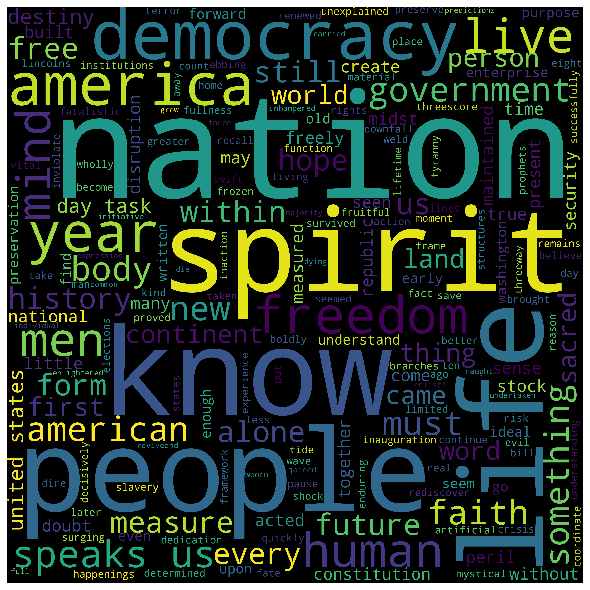

In [61]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud_r = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_r) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1941-Roosevelt Speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for 1941-Roosevelt Speech


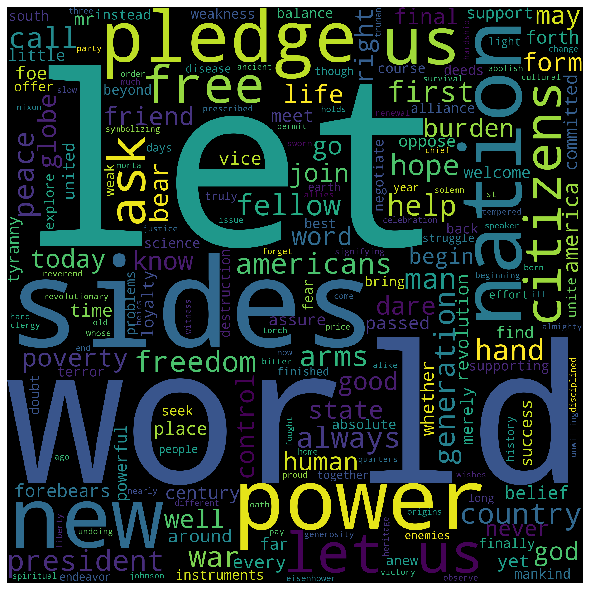

In [62]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_k) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1961-Kennedy Speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

Word Cloud for 1941-Roosevelt Speech


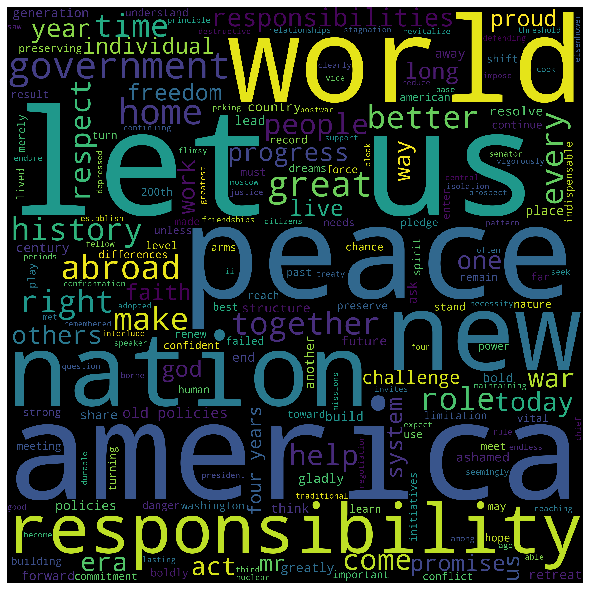

In [63]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_n) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for 1973-Nixon Speech")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

In [10]:
all_Words=[x for x in pd.Series(' '.join(Apple_tweets[0]).split())] 
# 1st we are spliting each row of the dataframe into words.
# 2nd we are joining all the above words with a space between them.
# 3rd we are making a Series out of it.
# 4th we we are extracting each word one by one and storing it in the variable all_Words.

In [11]:
#!pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jinendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
nltk.FreqDist(all_Words).most_common(10)

[('the', 114),
 ('of', 81),
 ('and', 46),
 ('to', 36),
 ('in', 35),
 ('we', 32),
 ('a', 30),
 ('it', 28),
 ('is', 24),
 ('that', 23)]

In [13]:
# Defining a variable 'stopwords' which contains the list of punctuations from the string library and the english stopwords
# from nltk
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

# Converting all the words to lower casse
all_words = (x.lower() for x in all_Words)# we can skip this line since we have already converted all the words to lowercase
# Only keeping the words which are not the 'stopwords'
all_words_clean = [word for word in all_words if word not in stopwords]


# Creating a frequency distribution of the lower case words which does not contain any stopwords
all_words_freq = nltk.FreqDist(all_words_clean)

# Extracting the  most common 2000 words after the list of words have been converted to lowercase and the stopwords 
word_features = [item[0] for item in all_words_freq.most_common(2000)]

In [14]:
word_features

['nation',
 'know',
 'spirit',
 'democracy',
 'us',
 'life',
 'people',
 'america',
 'years',
 'freedom',
 'human',
 'mind',
 'speaks',
 'day',
 'states',
 'nations',
 'men',
 'government',
 'new',
 'body',
 'must',
 'something',
 'faith',
 'united',
 'task',
 'within',
 'history',
 'live',
 'future',
 'free',
 'alone',
 'still',
 'every',
 'continent',
 'like',
 'person',
 'world',
 'sacred',
 'came',
 'first',
 'destiny',
 'national',
 '1789',
 'sense',
 'create',
 'together',
 'disruption',
 'without',
 'come',
 'time',
 'midst',
 'stock',
 'may',
 'lives',
 'little',
 'measure',
 'doubt',
 'measured',
 'americans',
 'true',
 'republic',
 'acted',
 'security',
 'things',
 'present',
 'many',
 'built',
 'maintained',
 'constitution',
 'freely',
 'american',
 'seen',
 'cannot',
 'enterprise',
 'forms',
 'hopes',
 'find',
 'even',
 'upon',
 'early',
 'peoples',
 'written',
 'land',
 'could',
 'forward',
 'go',
 'enough',
 'would',
 'seem',
 'old',
 'words',
 'preservation',
 'inaugurat

In [15]:
## We are defining a function to appropriately process the text document

def document_features(document): # we are naming the function as document_features
    document_words = set(document) #getting the unique number of entries in the document variable
    features = {} #defining an empty dictionary
    for word in word_features: #looping over the 'word_features' which has been defined in the last code block
        features['contains({})'.format(word)] = (word in document_words) #defining 'features' in  particular format
        # and checking whether the unique elements of the input 'document' are contained in the 'word_features' 
        # defined before
    return features

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jinendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
frame = Apple_tweets.copy() #storing Apple_tweets in another variables
frame.columns = ["feature", "label"] # defning the names of the colummn of the data frame 'frame'
frame['feature'] = frame.apply(lambda row: nltk.word_tokenize(str(row['feature'])), axis=1) #the features of the 'frame' data frame are stored in the variable 'feature'
# In the above code snippet we are tokenizing the variables
frame['label'] = frame.label # the labels of the 'frame' data frame are stored in the variable 'label'

ValueError: Length mismatch: Expected axis has 1 elements, new values have 2 elements

In [18]:
Apple_tweets

,0
0,on each national day of inauguration since 178...
1,in washingtons day the task of the people was ...
2,in lincolns day the task of the people was to ...
3,in this day the task of the people is to save ...
4,to us there has come a time in the midst of sw...
5,lives of nations are determined not by the cou...
6,there are men who doubt this there are men who...
7,but we americans know that this is not true
8,eight years ago when the life of this republic...
9,these later years have been living years fruit...


In [19]:
frame

,0
0,on each national day of inauguration since 178...
1,in washingtons day the task of the people was ...
2,in lincolns day the task of the people was to ...
3,in this day the task of the people is to save ...
4,to us there has come a time in the midst of sw...
5,lives of nations are determined not by the cou...
6,there are men who doubt this there are men who...
7,but we americans know that this is not true
8,eight years ago when the life of this republic...
9,these later years have been living years fruit...


In [20]:
frame['feature'][0]

KeyError: 'feature'

In [34]:
## We are defining our combined data frame which we will split into training and test before fitting a classifier

# We are creating a list the entries of which are a tuple. We are appending the list with tuples whose entries are the 
# pre-processed tweets and the corresponding sentiment attached to it.
featuresets = [(document_features(feature), label) for index, (feature, label) in frame.iterrows()]

In [35]:
featuresets[0]

({'contains(apple)': True,
  'contains(iphone)': False,
  'contains(new)': False,
  'contains(5s)': False,
  'contains(ipad)': False,
  'contains(itunes)': False,
  'contains(phone)': False,
  'contains(ipod)': False,
  'contains(get)': False,
  'contains(ipodplayerpromo)': False,
  'contains(5c)': False,
  'contains(im)': False,
  'contains(dont)': False,
  'contains(like)': False,
  'contains(promoipodplayerpromo)': False,
  'contains(itune)': False,
  'contains(app)': False,
  'contains(de)': False,
  'contains(rt)': False,
  'contains(ios)': False,
  'contains(freak)': False,
  'contains(make)': False,
  'contains(store)': False,
  'contains(one)': False,
  'contains(iphone5c)': False,
  'contains(iphone5s)': False,
  'contains(apples)': False,
  'contains(5)': False,
  'contains(u)': False,
  'contains(iphones)': False,
  'contains(time)': False,
  'contains(really)': False,
  'contains(need)': False,
  'contains(would)': False,
  'contains(google)': False,
  'contains(fingerprint

In [39]:
# Train Naive Bayes classifier
train_set, test_set = featuresets[0:int(len(featuresets)*0.7)], featuresets[int(len(featuresets)*0.7):]

classifier = nltk.NaiveBayesClassifier.train(train_set)

In [37]:
print(nltk.classify.accuracy(classifier, test_set))

0.6732394366197183


# Alternate Way: using Naive Bayes Classifier.
Now, let us reload the data and look at a few other text mining functionalities that Python offers us and then go on to fit a classifier algorithm.

In [40]:
## Loading the dataset
Apple_tweets = pd.read_csv("Apple_tweets.csv")

## Basic Exploration in Text Mining

### Number of words

**To create a temporary function lambda can be used. These functions do not require a name like a def function, however the output is same as defining a permanent function**
**As these function are temporary, memory comsumption is less in comparison to permanent function. Also there are multiple ways to get a similar output**


In [41]:
## Let's get a word count without writing a lambda function

Apple_tweets['totalwords'] = [len(x.split()) for x in Apple_tweets['Tweet'].tolist()]
Apple_tweets[['Tweet','totalwords']].head()

,Tweet,totalwords
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",11
4,.@apple has the best customer service. In and ...,16


In [42]:
Apple_tweets['word_count'] = Apple_tweets['Tweet'].apply(lambda x: len(str(x).split(" ")))
Apple_tweets[['Tweet','word_count']].head()

,Tweet,word_count
0,"I have to say, Apple has by far the best custo...",19
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,10
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",12
4,.@apple has the best customer service. In and ...,16


### Number of Characters- including spaces

In [43]:
Apple_tweets['char_count'] = Apple_tweets['Tweet'].str.len()
Apple_tweets[['Tweet','char_count']].head()

,Tweet,char_count
0,"I have to say, Apple has by far the best custo...",101
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,60
2,LOVE U @APPLE,13
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",91
4,.@apple has the best customer service. In and ...,82


In [44]:
Apple_tweets['Tweet'][0]

'I have to say, Apple has by far the best customer care service I have ever received! @Apple @AppStore'

In [45]:
len(Apple_tweets['Tweet'][0])

101

### Average Word Length

In [46]:
def avg_word(sentence):
    words = sentence.split() #splitting the words separately from the input taken
    return (sum(len(word) for word in words)/len(words)) # getting the average number of words in the each of the entries

Apple_tweets['avg_word'] = Apple_tweets['Tweet'].apply(lambda x: avg_word(x))
Apple_tweets[['Tweet','avg_word']].head()

,Tweet,avg_word
0,"I have to say, Apple has by far the best custo...",4.368421
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5.100000
2,LOVE U @APPLE,3.666667
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",7.272727
4,.@apple has the best customer service. In and ...,4.187500


### Number of stop Words

In [47]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

Apple_tweets['stopwords'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
Apple_tweets[['Tweet','stopwords']].head()

,Tweet,stopwords
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,8


### Number of special character

In [48]:
Apple_tweets['hastags'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
Apple_tweets[['Tweet','hastags']].head()

,Tweet,hastags
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",2
4,.@apple has the best customer service. In and ...,0


### Number of numerics

In [49]:
Apple_tweets['numerics'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[0-9]',x)))
Apple_tweets[['Tweet','numerics']].head()

,Tweet,numerics
0,"I have to say, Apple has by far the best custo...",0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,1
2,LOVE U @APPLE,0
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",3
4,.@apple has the best customer service. In and ...,2


### Number of Uppercase Words

In [50]:
Apple_tweets['upper'] = Apple_tweets['Tweet'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
Apple_tweets[['Tweet','upper']].head()

,Tweet,upper
0,"I have to say, Apple has by far the best custo...",2
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,0
2,LOVE U @APPLE,3
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1
4,.@apple has the best customer service. In and ...,0


### Number of Uppercase Letters

In [51]:
Apple_tweets['upper_letter'] = Apple_tweets['Tweet'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
Apple_tweets[['Tweet','upper_letter']].head()

,Tweet,upper_letter
0,"I have to say, Apple has by far the best custo...",6
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,5
2,LOVE U @APPLE,10
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",9
4,.@apple has the best customer service. In and ...,1


## Basic Pre-Processing

### Lower Case conversion

In [52]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Apple_tweets['Tweet'].head()

0    i have to say, apple has by far the best custo...
1    ios 7 is so fricking smooth & beautiful!! #tha...
2                                        love u @apple
3    thank you @apple, loving my new iphone 5s!!!!!...
4    .@apple has the best customer service. in and ...
Name: Tweet, dtype: object

### Removal of Punctuation

In [53]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets['Tweet'].head()

0    i have to say apple has by far the best custom...
1    ios 7 is so fricking smooth  beautiful thanxap...
2                                         love u apple
3    thank you apple loving my new iphone 5s apple ...
4    apple has the best customer service in and out...
Name: Tweet, dtype: object

### Removal of StopWords

In [54]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Apple_tweets['Tweet'].head()

0    say apple far best customer care service ever ...
1     ios 7 fricking smooth beautiful thanxapple apple
2                                         love u apple
3    thank apple loving new iphone 5s apple iphone5...
4          apple best customer service new phone 10min
Name: Tweet, dtype: object

### Common Words Removal
1. **We will create a list of 10 frequently occuring words and then decide if we need to remove it or retain it.**
2. **Reason is that this file has tweets related to Apple.. So no point in keeping the word like Apple, unless we have tweets from other brands**

In [55]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[:10]
freq

apple              1297
iphone              257
new                 113
5s                   91
ipad                 88
itunes               79
phone                75
ipod                 71
get                  60
ipodplayerpromo      60
dtype: int64

In [56]:
freq =['apple','get']

1. **As we are talking about multiple products hence iphone will be kept, similarly some tweets do relate to old products without mentioning the word old, hence even new would be kept in the tweets.**
2. **hence only apple and get would be removed**

In [57]:
Apple_tweets['Tweet'] = Apple_tweets['Tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Apple_tweets['Tweet'].head()

0    say far best customer care service ever receiv...
1           ios 7 fricking smooth beautiful thanxapple
2                                               love u
3    thank loving new iphone 5s iphone5s pictwitter...
4                best customer service new phone 10min
Name: Tweet, dtype: object

### Rare Words Removal
**This is done as association of these less occurring words with the existing words could be a noise**

In [58]:
freq = pd.Series(' '.join(Apple_tweets['Tweet']).split()).value_counts()[-10:]
freq
## As it is difficult to make out if these words will have association in text analytics or not, 
## hence to start with these words are kept in the dataset

postproduction    1
orra              1
however           1
qnx               1
winphan           1
courtesy          1
xd                1
americascup       1
goede             1
wsdot_traffic     1
dtype: int64

### Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [59]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
Apple_tweets['Tweet'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       say far best custom care servic ever receiv ap...
1                      io 7 frick smooth beauti thanxappl
2                                                  love u
3       thank love new iphon 5s iphone5 pictwittercomx...
4                      best custom servic new phone 10min
                              ...                        
1176                                                freak
1177      cant freak see pictur tl im annoy freak twitter
1178                                      freak cow freak
1179                          hate phone work im go freak
1180                     agounalaki that nasti nasti brat
Name: Tweet, Length: 1181, dtype: object

In [60]:
def Tweet(x):
    if x >= 0:
        return "Positive"
    else: return "Negative"


### Now to get the sentiments as positive and negative , convert the Avg column . If value is >= 0  then tweet is Positive, else tweet is Negative. This will make a dependent variable as a binary classifier

In [61]:
Apple_tweets["Sentiment"] = Apple_tweets["Avg"].apply(Tweet)

Apple_tweets.head()

,Tweet,Avg,totalwords,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,upper_letter,Sentiment
0,say far best customer care service ever receiv...,2.0,19,19,101,4.368421,6,0,0,2,6,Positive
1,ios 7 fricking smooth beautiful thanxapple,2.0,10,10,60,5.100000,2,1,1,0,5,Positive
2,love u,1.8,3,3,13,3.666667,0,0,0,3,10,Positive
3,thank loving new iphone 5s iphone5s pictwitter...,1.8,11,12,91,7.272727,2,2,3,1,9,Positive
4,best customer service new phone 10min,1.8,16,16,82,4.187500,8,0,2,0,1,Positive


In [62]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


## Let's look at distribution of different sentiments

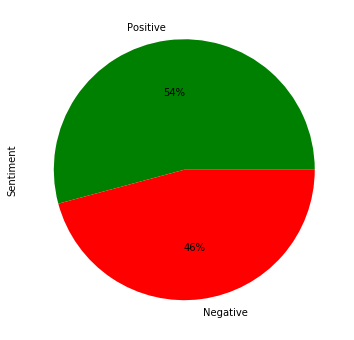

In [63]:
plt.figure(figsize=(8,6))
Apple_tweets.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green","red"])
plt.show()

In [64]:
Apple_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tweet         1181 non-null   object 
 1   Avg           1181 non-null   float64
 2   totalwords    1181 non-null   int64  
 3   word_count    1181 non-null   int64  
 4   char_count    1181 non-null   int64  
 5   avg_word      1181 non-null   float64
 6   stopwords     1181 non-null   int64  
 7   hastags       1181 non-null   int64  
 8   numerics      1181 non-null   int64  
 9   upper         1181 non-null   int64  
 10  upper_letter  1181 non-null   int64  
 11  Sentiment     1181 non-null   object 
dtypes: float64(2), int64(8), object(2)
memory usage: 110.8+ KB


In [65]:
processed_features = Apple_tweets.iloc[:, 0].values
labels = Apple_tweets.iloc[:, 11].values

In [66]:
processed_features

array(['say far best customer care service ever received appstore',
       'ios 7 fricking smooth beautiful thanxapple', 'love u', ...,
       'freaking cows freak', 'hate phone working im going freak',
       'agounalakis thats nasty nasty brat'], dtype=object)

In [67]:
labels

array(['Positive', 'Positive', 'Positive', ..., 'Negative', 'Negative',
       'Negative'], dtype=object)

## TfidfVectorizer

More here - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [69]:
vectorizer

TfidfVectorizer(max_df=0.8, max_features=2500, min_df=7)

In [70]:
## Extra Knowledge Bytes (TF-IDF)

# Let's see how our TD-IDF looks like (sorting by the feature named 5s)
# Creating the TF-IDF with the feature names given by the TFIDF vectorizer, sorting it for unerstanding.
# Let's chain the .head() method on the DataFrame to inspect the first few observations of the TD-IDF sorted by '5s'
pd.DataFrame(processed_features, columns = vectorizer.get_feature_names()).sort_values(by = '5s', ascending=False).head()

,5c,5s,7evenstarz,actually,already,always,amazing,amazon,android,anyone,...,wow,wtf,ya,yall,year,yes,yet,yo,yooo,youre
742,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
993,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
509,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.807513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Train-Test split

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.3, random_state=0)

In [72]:
y_train

array(['Negative', 'Negative', 'Positive', 'Negative', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Positive',
       'Positive', 'Negative', 'Positive', 'Positive', 'Negative',
       'Negative', 'Negative', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Positive', 'Negative', 'Positive',
       'Negative', 'Negative', 'Positive', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positi

# Gaussian Naive Bayes

In [73]:
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [74]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [75]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.7699757869249395
[[198 168]
 [ 22 438]]
              precision    recall  f1-score   support

    Negative       0.90      0.54      0.68       366
    Positive       0.72      0.95      0.82       460

    accuracy                           0.77       826
   macro avg       0.81      0.75      0.75       826
weighted avg       0.80      0.77      0.76       826



In [76]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                    ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))         ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))    ## classification_report

0.6704225352112676
[[ 92  83]
 [ 34 146]]
              precision    recall  f1-score   support

    Negative       0.73      0.53      0.61       175
    Positive       0.64      0.81      0.71       180

    accuracy                           0.67       355
   macro avg       0.68      0.67      0.66       355
weighted avg       0.68      0.67      0.66       355



**Pl. note - Model building is an iterative process. Model performance both on the test and train dataset can be improved using feature engineering, feature extraction, hyper parameter tuning (including combination of various parameters).** 

**Model has to match the business objective and hence various permutation and combinations can be tried on to refine the model**

## Creating a Wordcloud

In [77]:
# Recall Apple_Tweets['Tweet'] from above. It has been processed at a basic level!

Apple_tweets['Tweet'].iloc[30:31] #Checking a tweet at random!

30    dear love new default alarm ringtone goodmorning
Name: Tweet, dtype: object

In [78]:
# Removing symbols and punctuations 
# further_clean = Apple_tweets['Tweet'].str.replace('[^\w\s]','')

# Extending the list of stop words (including words like Apple, bitly, dear, please, etc.)
stop_words = list(stopwords.words('english'))
stop_words.extend(["apple", "http","bit","bitly","bit ly", "dear", "im", "i'm", "please"])

In [79]:
#Removing stop words (extended list as above) from the corpus 

corpus = Apple_tweets['Tweet'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words])) 
corpus

0       say far best customer care service ever receiv...
1              ios 7 fricking smooth beautiful thanxapple
2                                                  love u
3       thank loving new iphone 5s iphone5s pictwitter...
4                   best customer service new phone 10min
                              ...                        
1176                                                freak
1177    cant freaking see pictures tl annoyed freak tw...
1178                                  freaking cows freak
1179                       hate phone working going freak
1180                   agounalakis thats nasty nasty brat
Name: Tweet, Length: 1181, dtype: object

In [80]:
wc_a = ' '.join(corpus)

Word Cloud for Apple_Tweets (after cleaning)!!


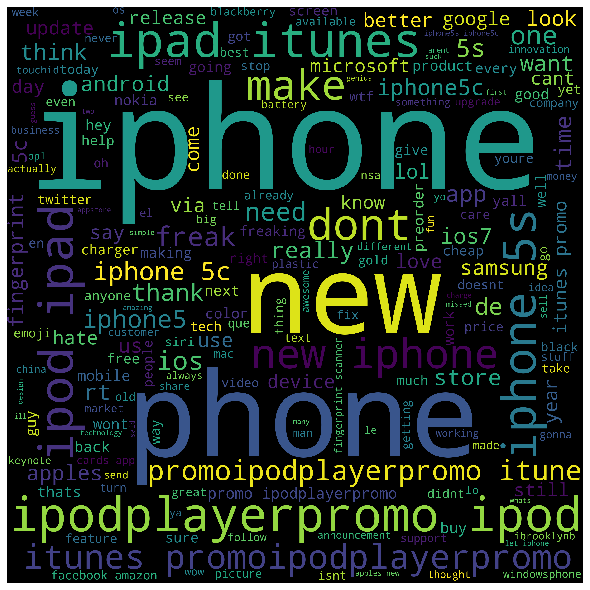

In [81]:
# Word Cloud 
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000, 
                background_color ='black', 
                min_font_size = 10, random_state=100).generate(wc_a) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0) 

print("Word Cloud for Apple_Tweets (after cleaning)!!")
plt.show()

#Tip: You can specify stopwords, regex (punctuations/symbols) in the wordcloud itself, check CTRL+TAB on the wordcloud fuction!

# END